Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Em

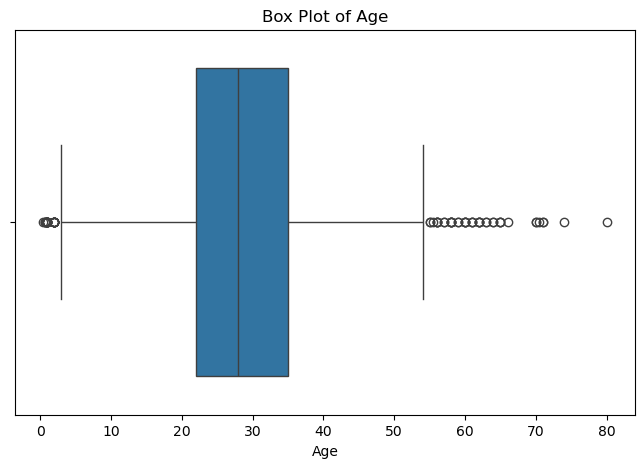

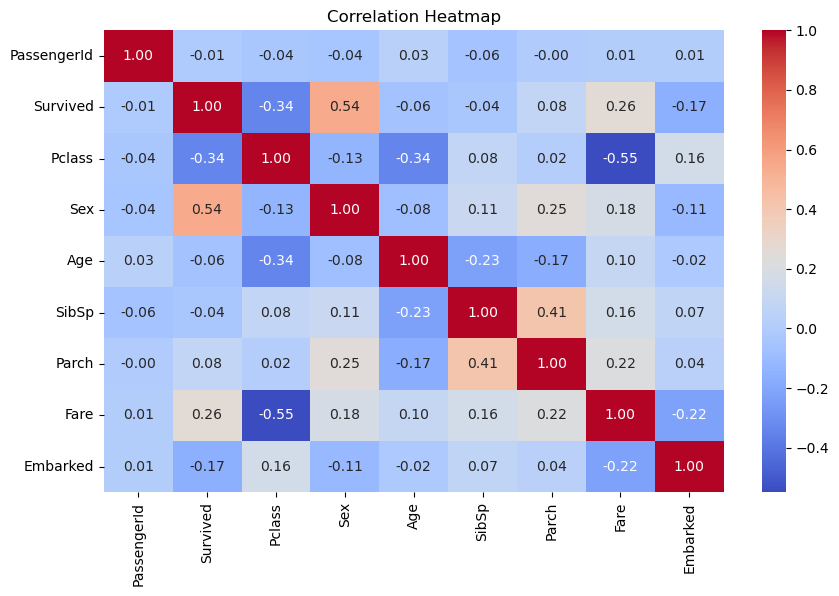

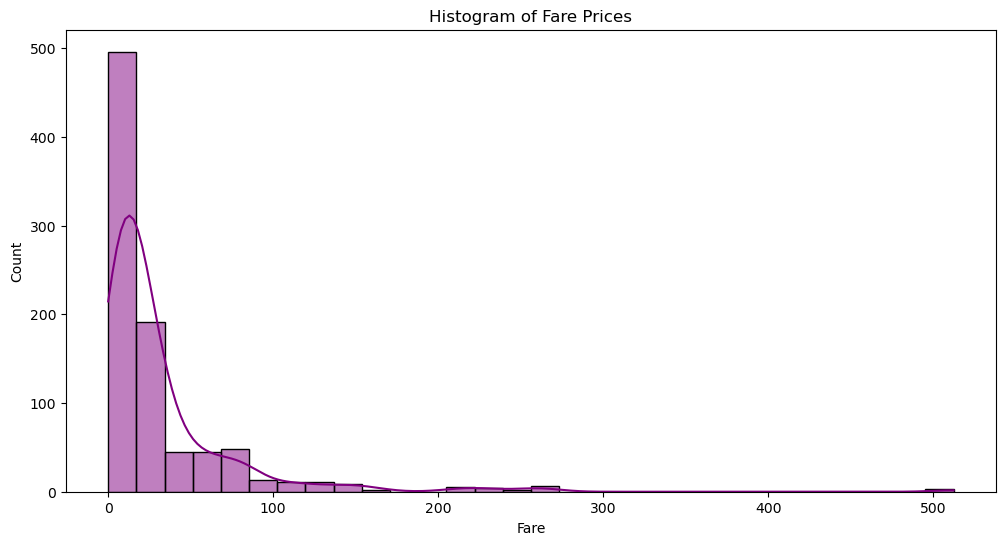

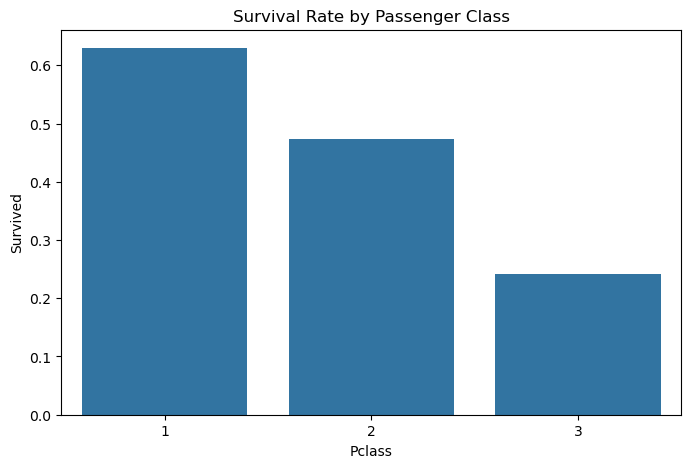

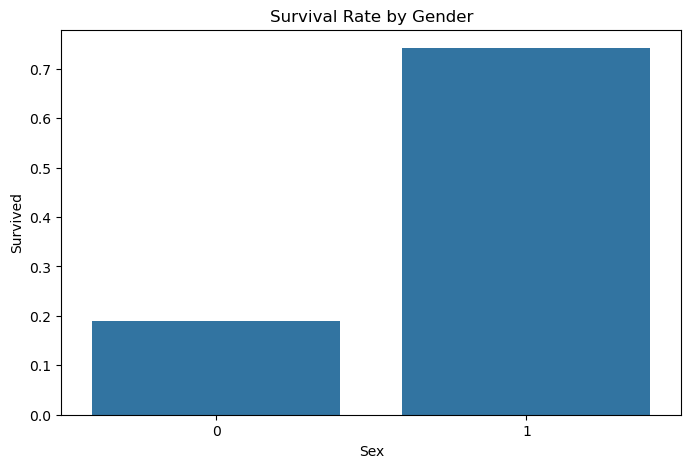

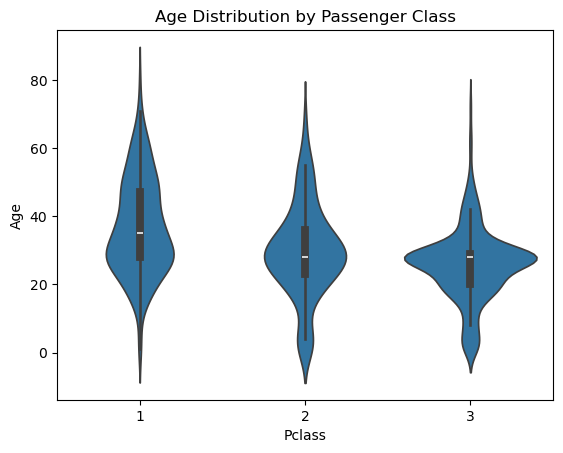

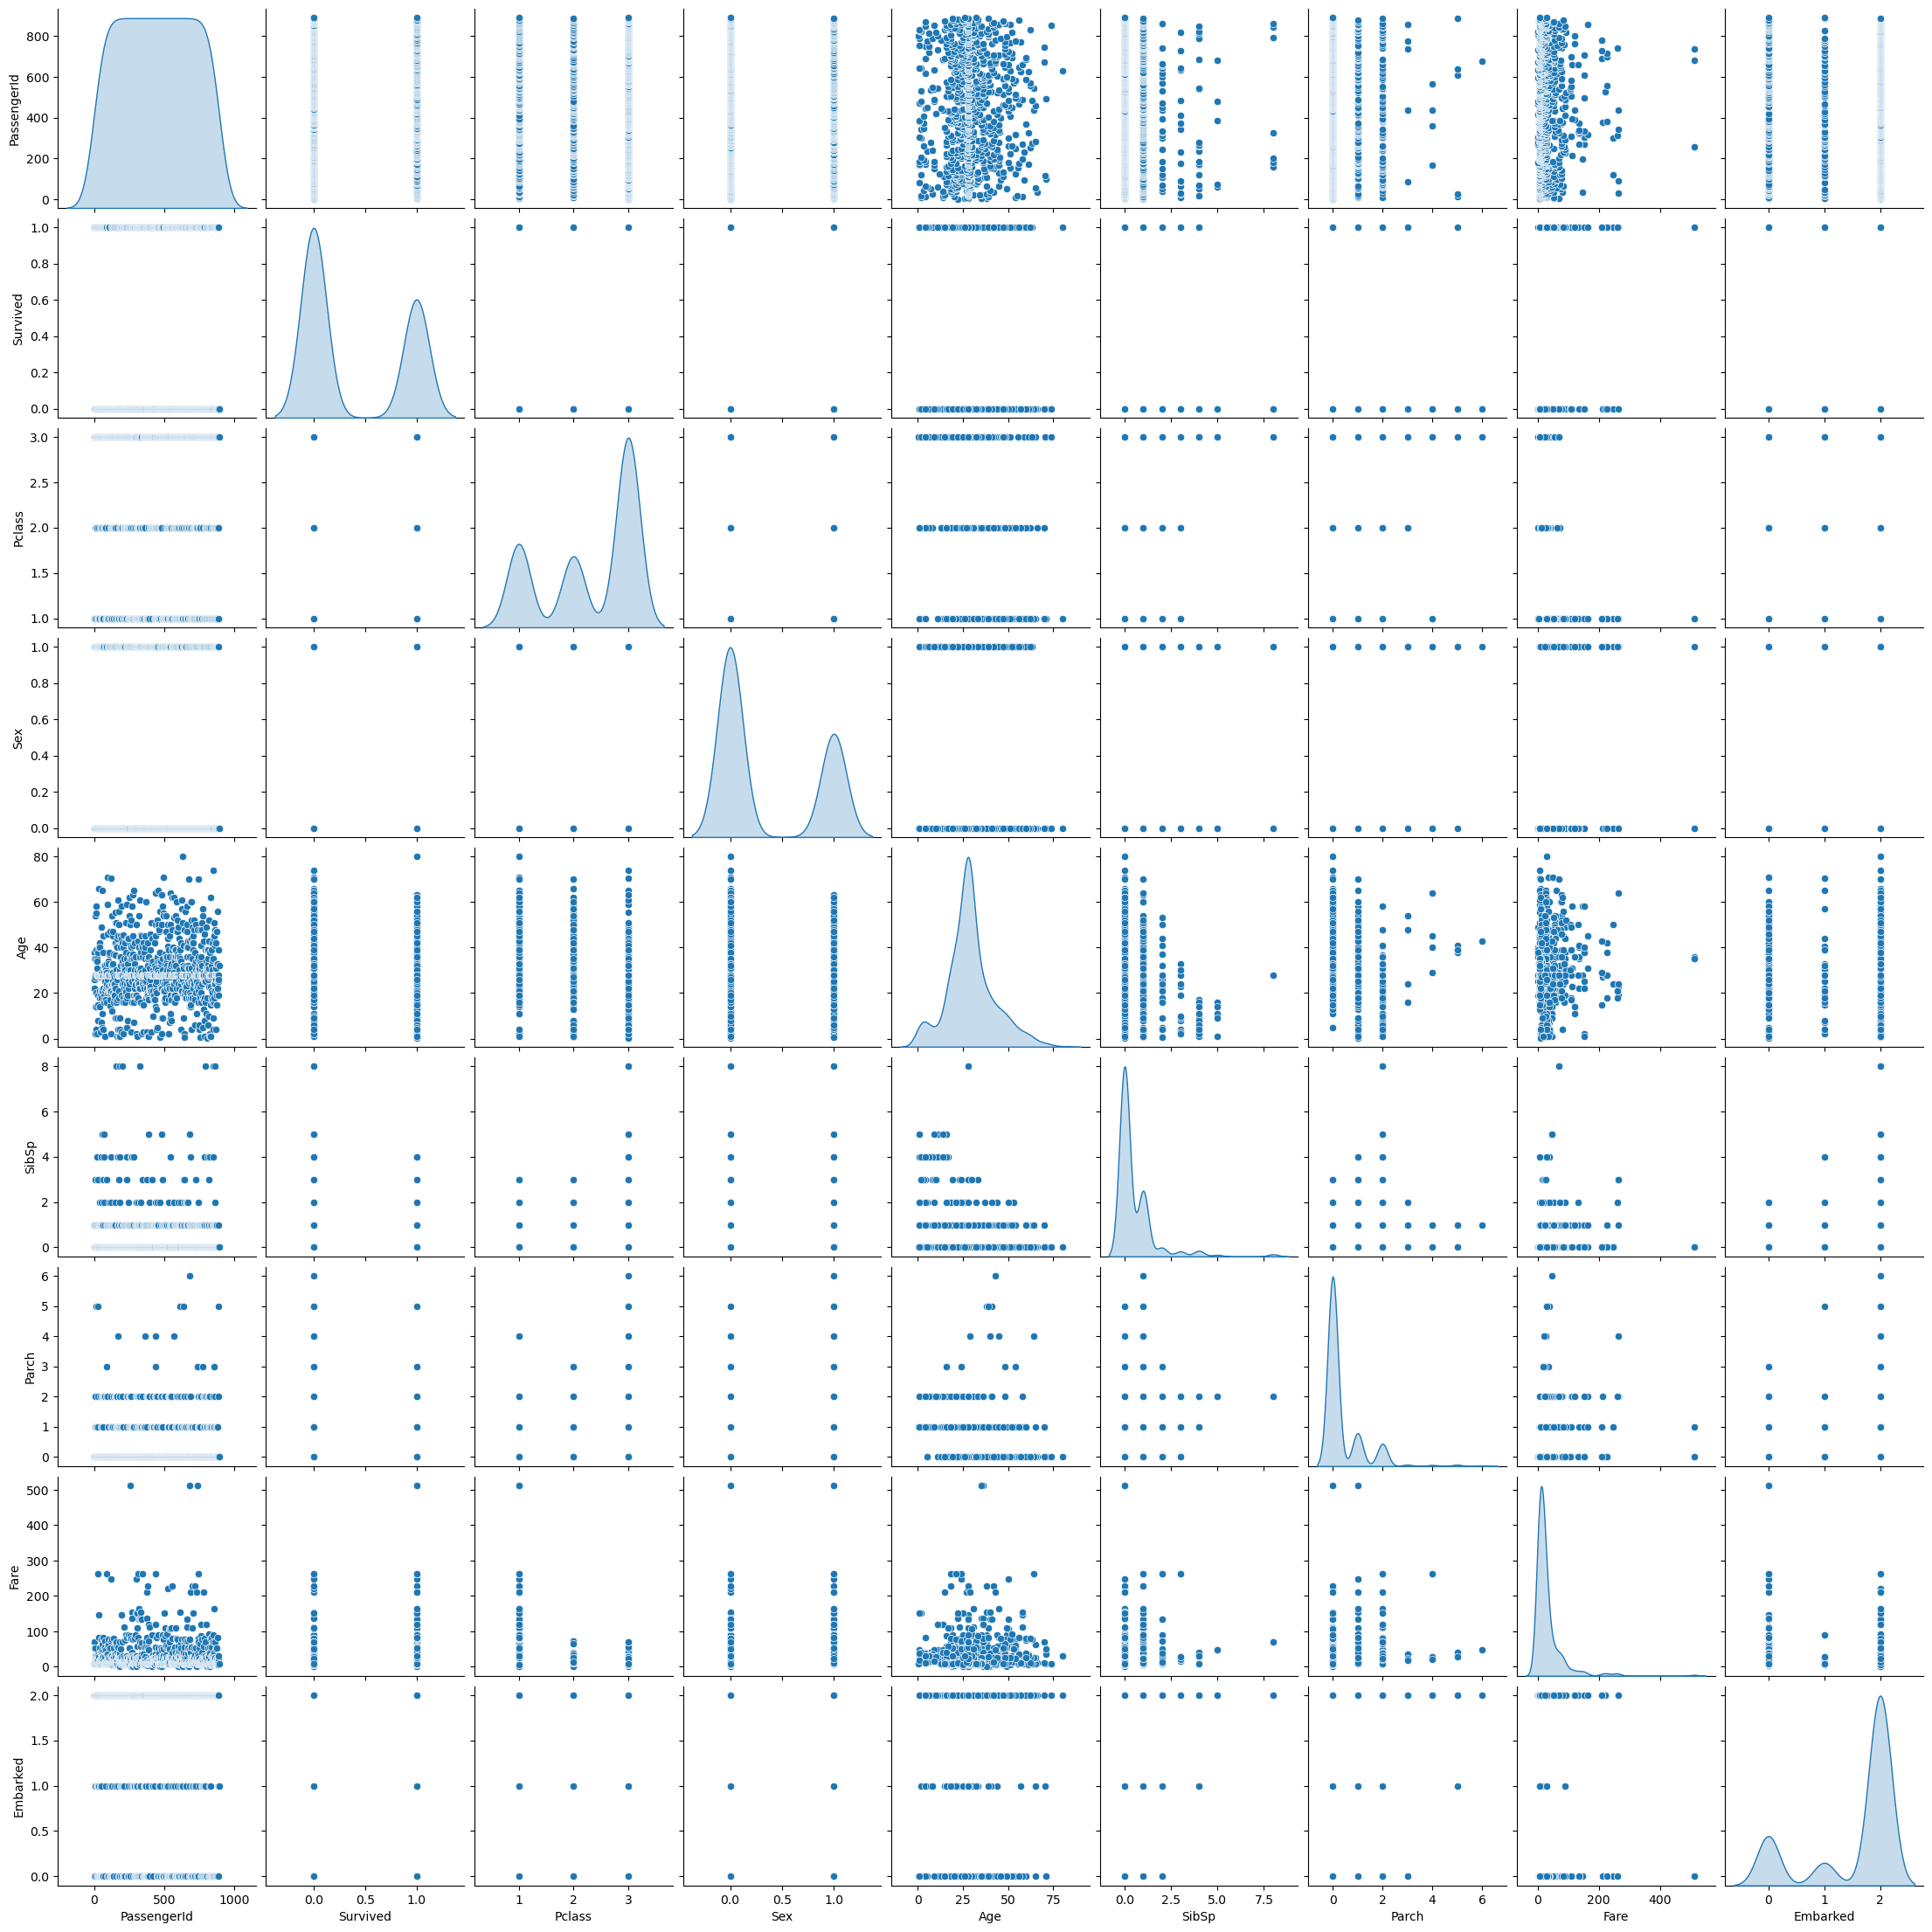

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Info:\n")
df.info()

print("\nMissing Values:\n", df.isnull().sum())

df["Age"] = df["Age"].fillna(df["Age"].median())  
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])  
df.drop(columns=["Cabin"], inplace=True)  

df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) 
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})  

df_numeric = df.select_dtypes(include=["number"])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Age"])
plt.title("Box Plot of Age")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df["Fare"], bins=30, kde=True, color="purple")
plt.title("Histogram of Fare Prices")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Survived", data=df, errorbar=None)
plt.title("Survival Rate by Gender")
plt.show()

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  

sns.violinplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

sns.pairplot(df_numeric, diag_kind="kde")
plt.show()

